In [1]:
from __future__ import print_function

import sys
import os

#sys.path.append('UrbanCNN/');
#sys.path.append('srimmele/');
#sys.path.append('ecbm4040/');

from matplotlib.pyplot import imshow, plot

from srimmele.data_utils import getCityImages
from UrbanCNN.utils import generator_from_file

# these magics ensure that external modules that are modified are also automatically reloaded
%load_ext autoreload
%autoreload 2
%matplotlib inline


In [2]:
city = 'berlin, de'
if not os.path.exists('imagery/' + city):
    getCityImages(city)
else:
    print ('Image files already extracted')

Image files already extracted


In [8]:
train_generator     = generator_from_file('data/train.csv', image_generator=None, balance=1, \
                            batch_size = 100, seed=26, new_img_shape= (224,224), \
                            class_dict=None, shuffle=True, channels="RGB",
                            downsample=False, crop=42, batch_type = 'training', one_hot = False)

validation_generator = generator_from_file('data/train.csv', image_generator=None, balance=1, \
                        batch_size = 100, seed=26, new_img_shape= (224,224), \
                        class_dict=None, shuffle=True, channels="RGB",
                        downsample=False, batch_type = 'validation', one_hot = False)


/home/ecbm4040/miniconda2/envs/dlenv/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


1

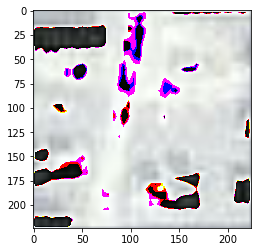

In [9]:
test = next(train_generator)
image =imshow(test[0][0,:,:,:])
test[1][0]

In [6]:
conv_feat_dict = {}

conv_feat_dict[0] = [64 , 64]
conv_feat_dict[1] = [128 , 128]
conv_feat_dict[2] = [256 ,256, 256]
conv_feat_dict[3] = [512 , 512, 512]
conv_feat_dict[4] = [512 , 512, 512]

conv_kernel_dict = dict(keys = conv_feat_dict.keys())

conv_kernel_dict[0] = [3] * 2
conv_kernel_dict[1] = [3] * 2
conv_kernel_dict[2] = [3] * 3
conv_kernel_dict[3] = [3] * 3
conv_kernel_dict[4] = [3] * 3

pooling_size_dict = dict(keys = conv_feat_dict.keys())

pooling_size_dict[0] = [3] * 2
pooling_size_dict[1] = [3] * 2
pooling_size_dict[2] = [3] * 3
pooling_size_dict[3] = [3] * 3 
pooling_size_dict[4] = [3] * 3

fc_units = [4096, 4096]


In [10]:
import tensorflow as tf
from srimmele.classifiers import training

tf.reset_default_graph()

training(train_generator, validation_generator,
             conv_feat_dict = conv_feat_dict,
             fc_units = fc_units,
             conv_kernel_dict = conv_kernel_dict,
             pooling_size_dict = pooling_size_dict,
             img_size = 224,
             l2_norm=0.01,
             seed=26,
             learning_rate=0.1,
             lr_decay = 2.0,
             epoch=20,
             samples_per_epoch = 2000,
             verbose=False,
             pre_trained_model=None)

epoch 1 


/home/ecbm4040/miniconda2/envs/dlenv/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Iteration: 
5
Iteration: 
10
Iteration: 
15
Iteration: 
20
Best validation accuracy! iteration:20 accuracy: 19.0%
Iteration: 
25
Iteration: 
30
Iteration: 
35
Iteration: 
40
Best validation accuracy! iteration:40 accuracy: 26.0%
Iteration: 
45
Iteration: 
50
Iteration: 
55
Iteration: 
60
epoch 2 
Iteration: 
65
Iteration: 
70
Iteration: 
75
Iteration: 
80
Iteration: 
85
Iteration: 
90
Iteration: 
95
Iteration: 
100
Iteration: 
105
Iteration: 
110
Iteration: 
115
Iteration: 
120
epoch 3 
Iteration: 
125
Iteration: 
130
Iteration: 
135
Iteration: 
140
Iteration: 
145
Iteration: 
150
Iteration: 
155
Iteration: 
160


KeyboardInterrupt: 